In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading the data
data=pd.read_csv('churn_prediction.csv')

In [3]:
data.shape

(28382, 21)

In [4]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [5]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [6]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [7]:
data.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [8]:
data['city'].value_counts()

1020.0    3479
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
          ... 
629.0        1
527.0        1
1212.0       1
530.0        1
70.0         1
Name: city, Length: 1604, dtype: int64

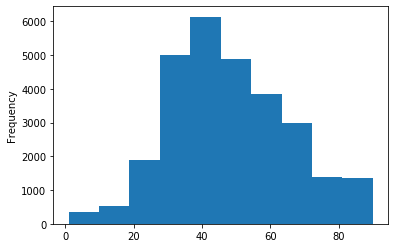

In [9]:
data['age'].plot.hist()

In [10]:
data['gender'].value_counts()/len(data['gender'])

Male      0.583046
Female    0.398457
Name: gender, dtype: float64

In [11]:
data['occupation'].value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [12]:
data['city'].value_counts()

1020.0    3479
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
          ... 
629.0        1
527.0        1
1212.0       1
530.0        1
70.0         1
Name: city, Length: 1604, dtype: int64

In [13]:
data['days_since_last_transaction'].value_counts()

0.0      1672
3.0       831
14.0      654
4.0       632
6.0       596
         ... 
170.0       1
218.0       1
334.0       1
288.0       1
321.0       1
Name: days_since_last_transaction, Length: 360, dtype: int64

In [14]:
data.nunique()

customer_id                       28382
vintage                            5473
age                                  90
gender                                2
dependents                           15
occupation                            5
city                               1604
customer_nw_category                  3
branch_code                        3185
days_since_last_transaction         360
current_balance                   27903
previous_month_end_balance        27922
average_monthly_balance_prevQ     27801
average_monthly_balance_prevQ2    27940
current_month_credit              10411
previous_month_credit             10711
current_month_debit               13704
previous_month_debit              14010
current_month_balance             27944
previous_month_balance            27913
churn                                 2
dtype: int64

In [15]:
for column in ['gender', 'occupation','city','dependents','days_since_last_transaction']:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [16]:
#data now has no missing values

In [17]:
data.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [18]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,1020.0,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,0.0,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,Male,0.0,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [19]:
data.tail(10)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
28372,30292,2161,49,Male,1.0,self_employed,1320.0,3,1347,25.0,...,10535.24,2145.22,5827.11,286.33,10686.33,10609.46,609.46,2046.76,3843.40,1
28373,30293,2384,73,Male,0.0,retired,1381.0,3,790,3.0,...,1926.57,1491.87,1973.16,2514.47,433.49,1039.76,180.37,1410.80,1800.70,0
28374,30294,658,55,Male,0.0,salaried,1076.0,3,463,306.0,...,7713.88,7713.88,7670.06,0.33,0.33,0.33,0.33,7713.88,7713.88,1
28375,30295,2041,42,Male,0.0,self_employed,146.0,2,286,57.0,...,6777.41,8082.48,3515.03,0.51,90.10,1103.20,1183.04,7956.03,7431.36,0
28376,30296,2155,85,Male,0.0,retired,1589.0,2,389,0.0,...,1741.50,1741.50,1730.46,0.04,0.04,0.04,0.04,1741.50,1741.50,0
28377,30297,1845,10,Female,0.0,student,1020.0,2,1207,70.0,...,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
28378,30298,4919,34,Female,0.0,self_employed,1046.0,2,223,14.0,...,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
28379,30299,297,47,Male,0.0,salaried,1096.0,2,588,0.0,...,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1
28380,30300,2585,50,Male,3.0,self_employed,1219.0,3,274,0.0,...,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0
28381,30301,2349,18,Male,0.0,student,1232.0,2,474,59.0,...,2821.34,3213.44,4447.45,0.11,7.44,714.40,1094.09,2402.62,3260.58,1


In [20]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [21]:
data['gender'].value_counts()

Male      17073
Female    11309
Name: gender, dtype: int64

In [22]:
#df is the new dataframe having cleaned data
df=pd.get_dummies(data).head(28382)

In [23]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [24]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
dependents                        float64
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
gender_Female                       uint8
gender_Male                         uint8
occupation_company                  uint8
occupation_retired                  uint8
occupation_salaried               

In [25]:
df.shape

(28382, 26)

In [26]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
dependents                        float64
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
gender_Female                       uint8
gender_Male                         uint8
occupation_company                  uint8
occupation_retired                  uint8
occupation_salaried               

In [27]:
df.isnull().sum()

customer_id                       0
vintage                           0
age                               0
dependents                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
gender_Female                     0
gender_Male                       0
occupation_company                0
occupation_retired                0
occupation_salaried               0
occupation_self_employed          0
occupation_student                0
dtype: int64

In [28]:
#x is all the independent variables and y is our target variable 
x=df.drop(['churn'],axis=1)
y=df['churn']

In [29]:
x.shape ,y.shape

((28382, 25), (28382,))

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
train_x,valid_x,train_y,valid_y = train_test_split(x,y,random_state = 101,stratify=y)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [33]:
model1=LogisticRegression()
model1.fit(train_x,train_y)
pred1=model1.predict(valid_x)
pred1[:10], model1.score(valid_x,valid_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64), 0.8251127395715896)

In [34]:
model2=KNeighborsClassifier(n_neighbors=5)
model2.fit(train_x,train_y)
pred2=model2.predict(valid_x)
pred2[:10], model2.score(valid_x,valid_y)

(array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64), 0.8416009019165727)

In [35]:
model3=DecisionTreeClassifier(max_depth=8)
model3.fit(train_x,train_y)
pred3=model3.predict(valid_x)
pred3[:10], model3.score(valid_x,valid_y)

(array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64), 0.8569616685456595)

In [36]:
# df = pd.DataFrame(columns=['M1', 'M2', 'M3', 'Actual'])
# df['M1'] = pred1
# df['M2'] = pred2
# df['M3'] = pred3
# df['Actual'] = np.array(valid_y)

In [37]:
from statistics import mode
final_pred = np.array([])
for i in range(0,len(valid_x)):
    final_pred = np.append(final_pred, mode([pred1[i], pred2[i], pred3[i]]))

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
#this is the accuracy score of the whole ensemble model
accuracy_score(valid_y, final_pred)

0.8492108229988726

In [40]:
#this is the accuracy of each of the model 
accuracy_score(valid_y, pred1), accuracy_score(valid_y, pred2), accuracy_score(valid_y, pred3)

(0.8251127395715896, 0.8416009019165727, 0.8569616685456595)